In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

## Data loading

In [39]:
df = pd.read_csv("data/togo-dapaong_qc.csv")

## Summary Statistics & Missing Value Report

In [40]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [41]:
df.shape

(525600, 19)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [43]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [44]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [45]:
df.duplicated().sum()

np.int64(0)

## Outlier detection

In [46]:
check=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[check].dropna() # dropped NA values
z_scores = np.abs(zscore(df_z))
outlier_z = z_scores > 3
total_outlier_rows = np.any(outlier_z, axis=1).sum()
total_outlier_rows

np.int64(9251)

# Drop empty columns

In [47]:
df.drop(columns=["Comments"], inplace=True)

## Cleaning Outliers

In [48]:
for col in check:
    z=zscore(df[col])
    outliers=np.abs(z)>3
    median=df[col].median()
    df.loc[outliers,col]=median

In [49]:
for col in check:
    z = zscore(df[col])
    outliers = np.abs(z) > 3
    print(f"{col}: {outliers.sum()} outliers remaining")


GHI: 17 outliers remaining
DNI: 268 outliers remaining
DHI: 1540 outliers remaining
ModA: 3 outliers remaining
ModB: 5 outliers remaining
WS: 1430 outliers remaining
WSgust: 946 outliers remaining


## Cleaning Outliers
this is the second cleaning of the outliers cleaning more that this can affect the standard deviation of the data

In [50]:
for col in check:
    z=zscore(df[col])
    outliers=np.abs(z)>3
    median=df[col].median()
    df.loc[outliers,col]=median

In [51]:
for col in check:
    z = zscore(df[col])
    outliers = np.abs(z) > 3
    print(f"{col}: {outliers.sum()} outliers remaining")

GHI: 0 outliers remaining
DNI: 75 outliers remaining
DHI: 689 outliers remaining
ModA: 0 outliers remaining
ModB: 0 outliers remaining
WS: 0 outliers remaining
WSgust: 0 outliers remaining


In [52]:
df.to_csv("data/togo-cleaned.csv", index=False) #export cleaned data

## Time Series Analysis

In [53]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\Bereket\AppData\Local\Temp\ipykernel_22684\364050496.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Bereket\Documents\week0\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


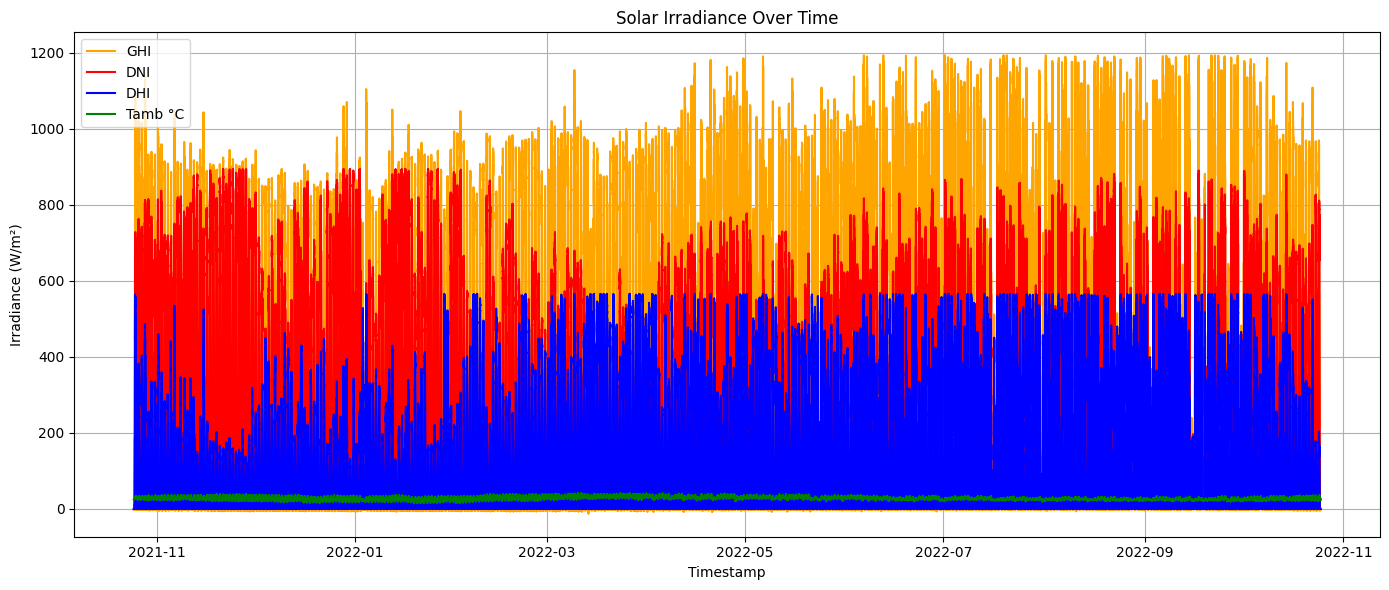

In [54]:
plt.figure(figsize=(14, 6))

plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='red')
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='blue')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb °C', color='green')

plt.title('Solar Irradiance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


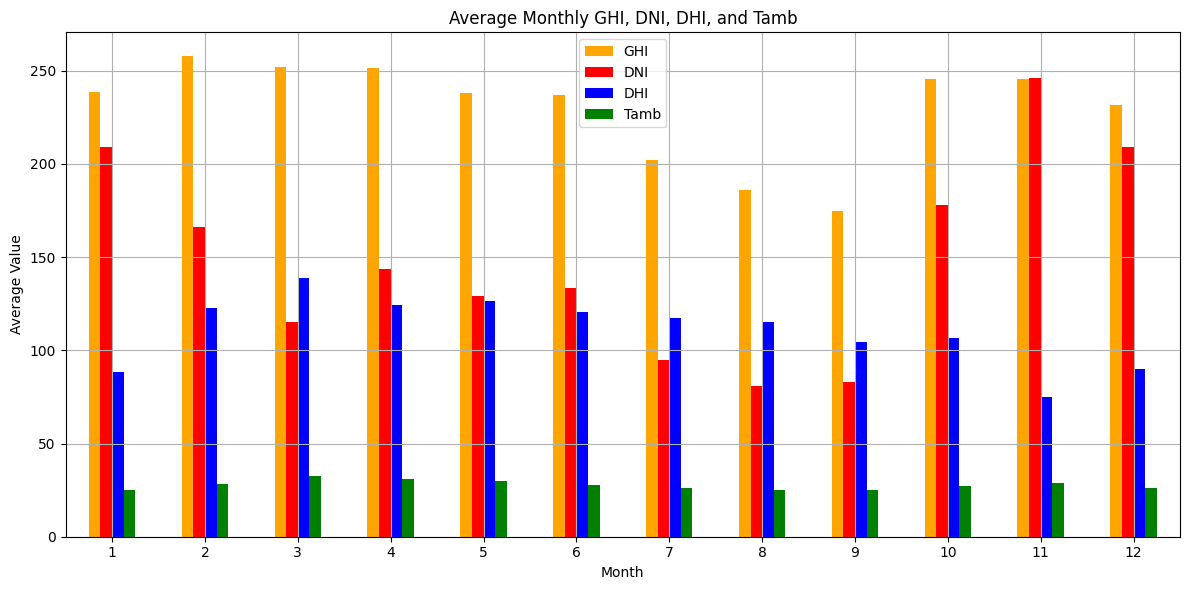

In [55]:
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

colors = {'GHI': 'orange','DNI': 'red','DHI': 'blue','Tamb': 'green'}

monthly_avg.plot(kind='bar', figsize=(12, 6), color=[colors[col] for col in monthly_avg.columns])

plt.title('Average Monthly GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


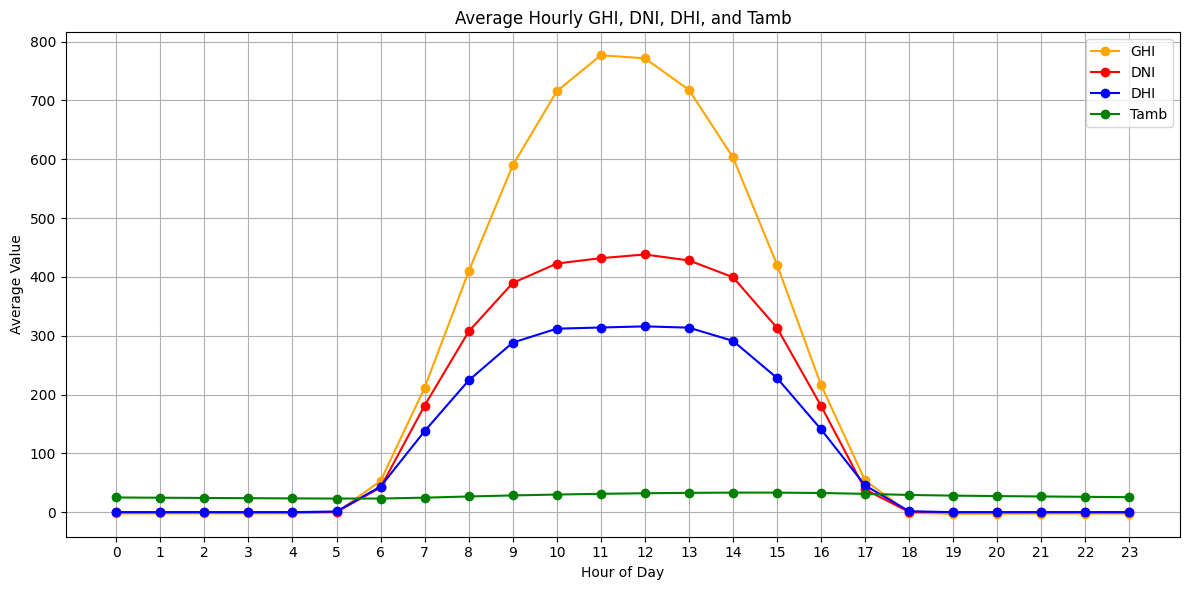

In [56]:
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot with custom colors for each variable
plt.figure(figsize=(12, 6))

plt.plot(hourly_avg.index, hourly_avg['GHI'], label='GHI', color='orange', marker='o')
plt.plot(hourly_avg.index, hourly_avg['DNI'], label='DNI', color='red', marker='o')
plt.plot(hourly_avg.index, hourly_avg['DHI'], label='DHI', color='blue', marker='o')
plt.plot(hourly_avg.index, hourly_avg['Tamb'], label='Tamb', color='green', marker='o')

plt.title('Average Hourly GHI, DNI, DHI, and Tamb')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()



## Wind rose

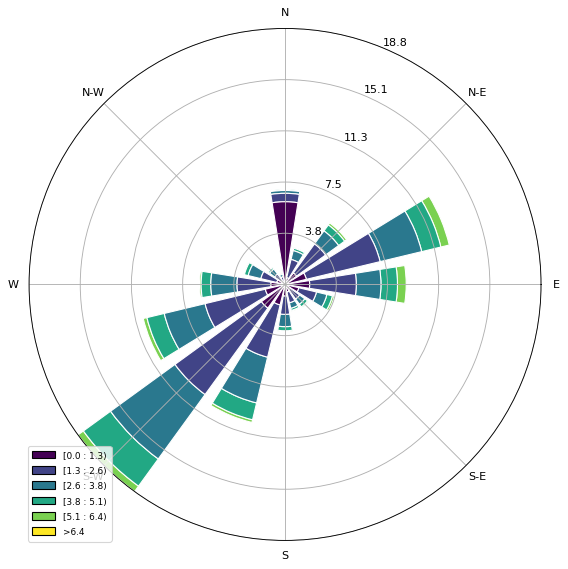

In [57]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

### 📈 Time Series Analysis Summary

- **Line plots** show clear daily cycles in GHI, DNI, DHI, and Tamb.
- Solar irradiance values peak between **11am–2pm**, with **Tamb** peaking shortly after due to heat lag.
- **Monthly trends** show that solar radiation is strongest in [insert months] and lowest in [insert months], likely due to [dry/wet season].
- Observed some spikes in temperature and sudden dips in GHI, indicating possible cloud cover or anomalies.
- This analysis supports identifying **optimal hours and months** for solar energy generation in Benin.


## Cleaning Impact on ModA and ModB

In [58]:
clean_impact=df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

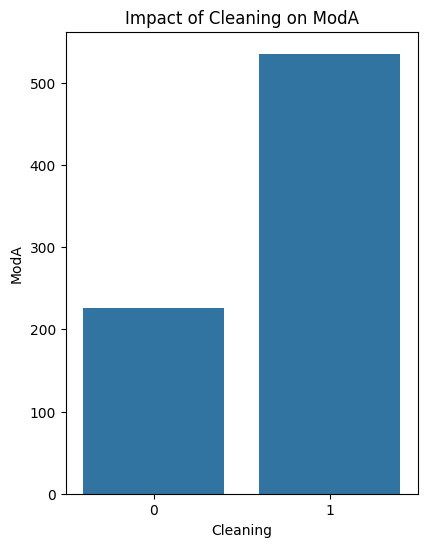

In [59]:
#plotting the impact of cleaning on ModA and ModB
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(x='Cleaning', y='ModA', data=clean_impact)
plt.title('Impact of Cleaning on ModA')
plt.show()

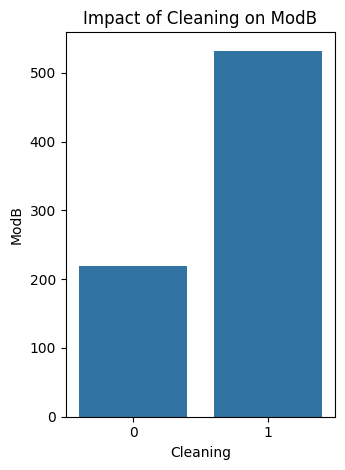

In [60]:
plt.subplot(1,2,2)
sns.barplot(x='Cleaning', y='ModB', data=clean_impact)
plt.title('Impact of Cleaning on ModB')
plt.tight_layout()
plt.show()

## Correlation Analysis

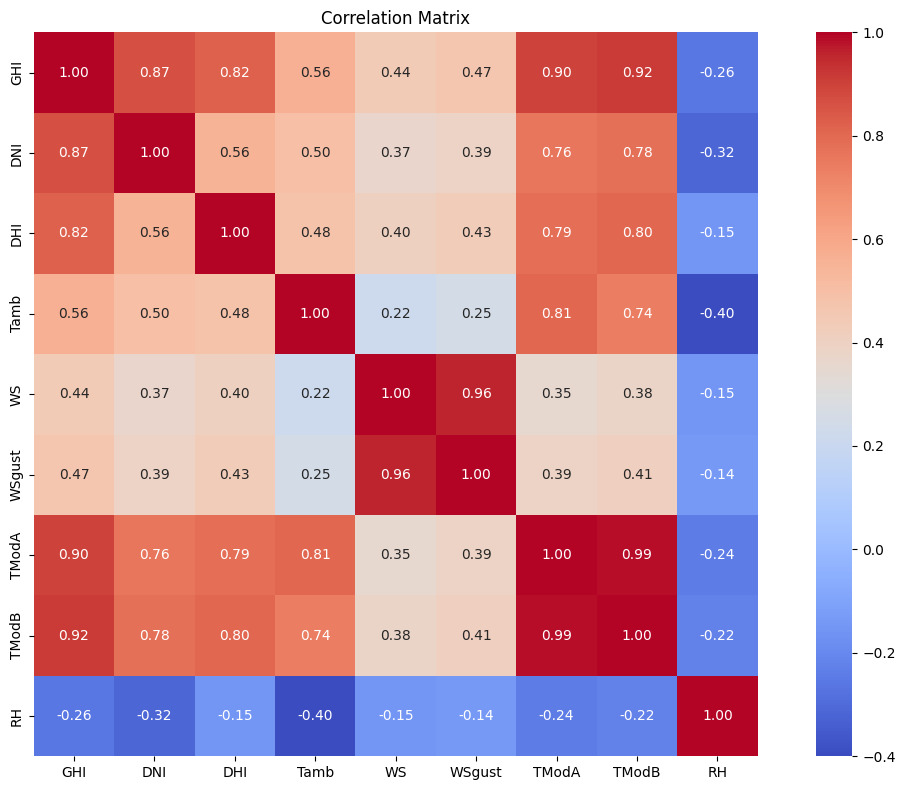

In [61]:
correlation=['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'WSgust', 'TModA', 'TModB','RH']
correlation_matrix = df[correlation].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Relationship Analysis

### Wind speed vs GHI

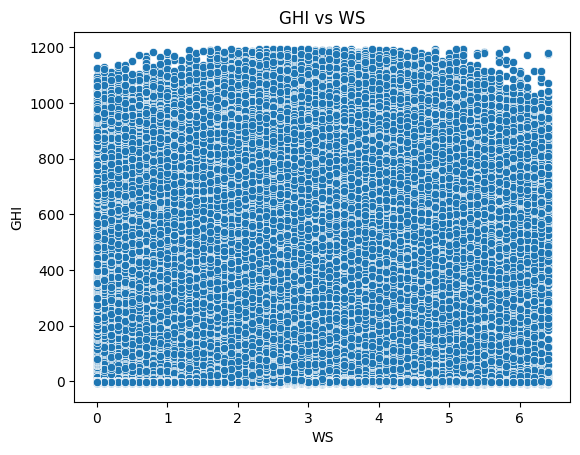

In [62]:
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('GHI vs WS')
plt.show()

### WSgust vs GHI

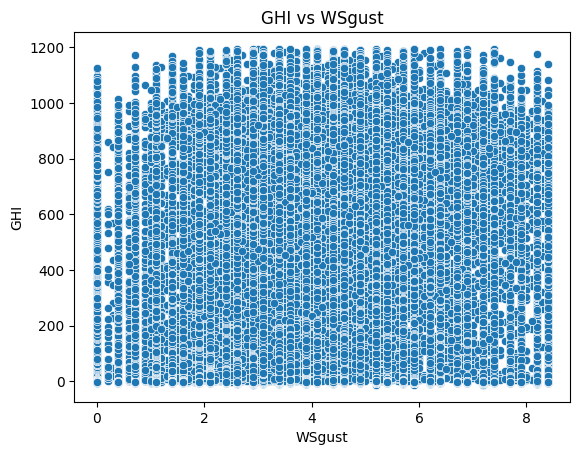

In [63]:
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('GHI vs WSgust')
plt.show()

### Wind Direction vs GHI

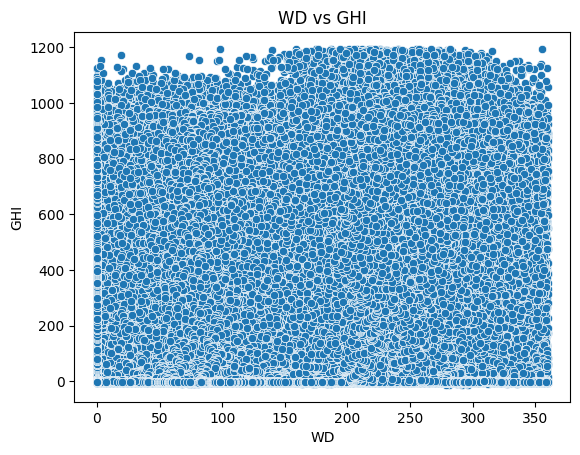

In [64]:
sns.scatterplot(data=df, x='WD', y='GHI')
plt.title('WD vs GHI')
plt.show()

### RH vs Tamb

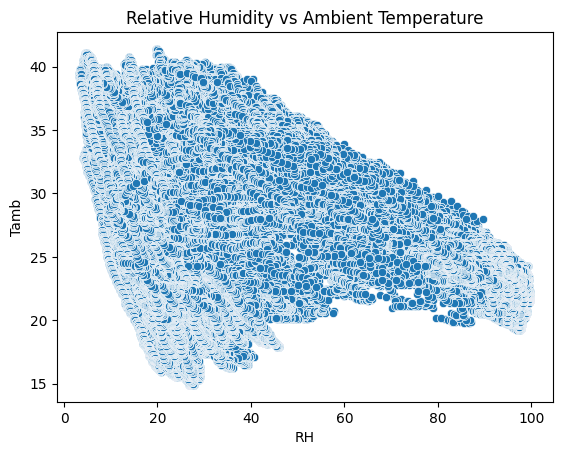

In [65]:
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title('Relative Humidity vs Ambient Temperature')
plt.show()

### RH vs GHI

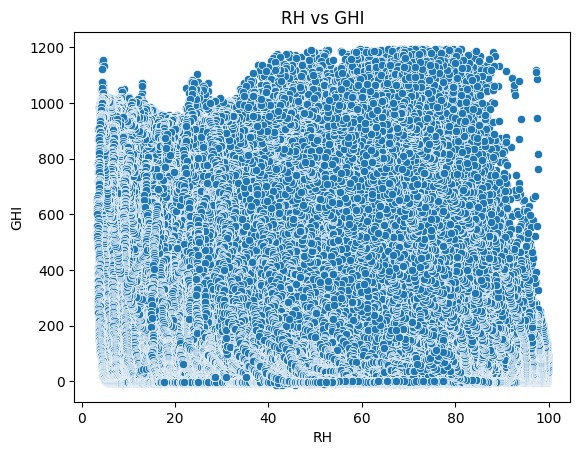

In [66]:
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title('RH vs GHI')
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\Bereket\\Documents\\week0\\solar-challenge-week1\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

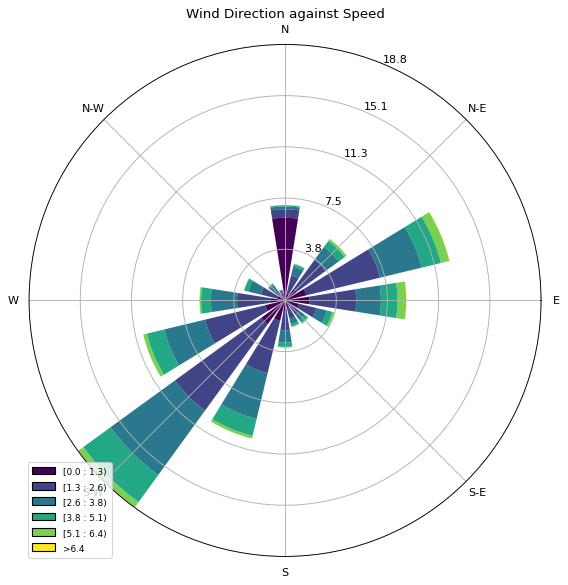

In [67]:
ax=WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8)
ax.set_legend()
plt.title('Wind Direction against Speed')
plt

## Histogram for GHI

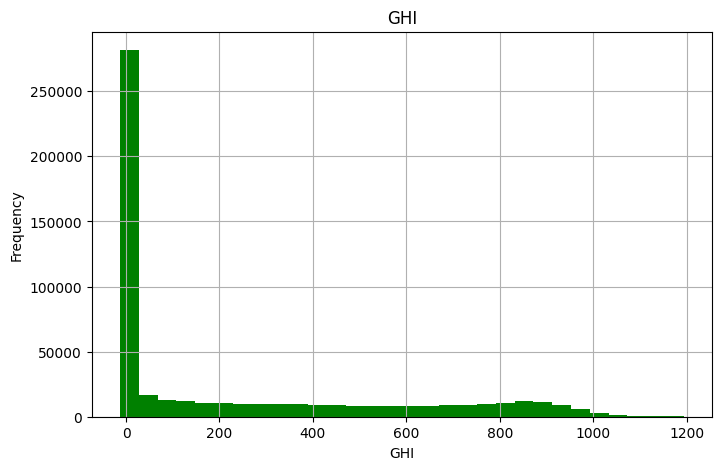

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(df['GHI'], bins=30, color='green')
plt.title("GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Histogram for WS

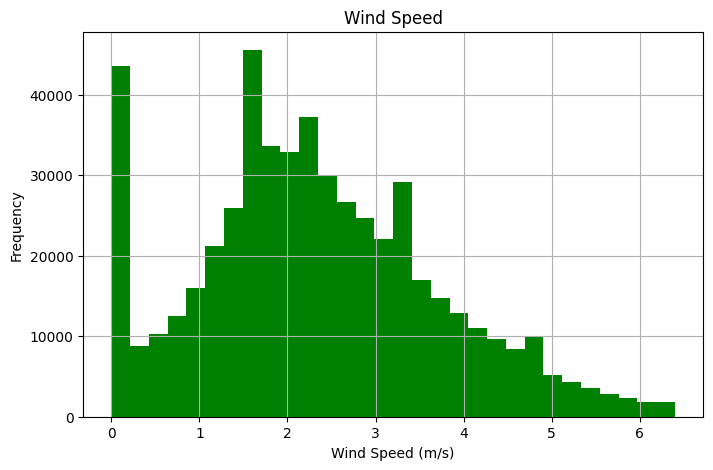

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(df['WS'], bins=30, color='green')
plt.title("Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Histogram for DNI

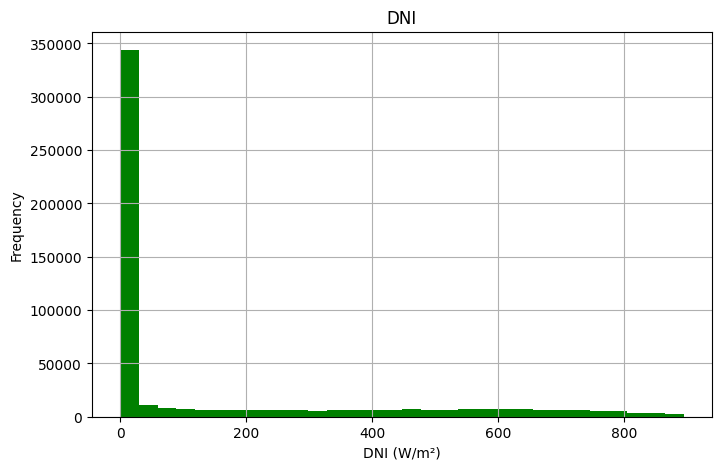

In [70]:
plt.figure(figsize=(8, 5))
plt.hist(df['DNI'], bins=30, color='green')
plt.title("DNI")
plt.xlabel("DNI (W/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

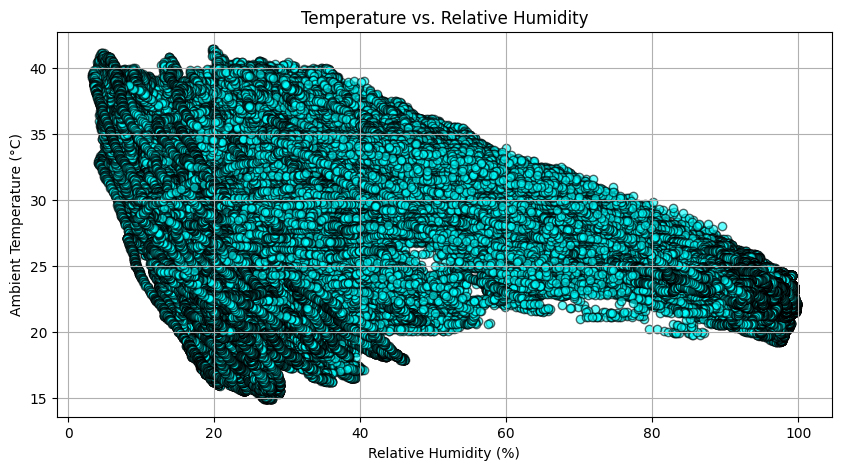

Correlation between RH and Tamb: -0.40


In [71]:
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['Tamb'], alpha=0.6, color='aqua', edgecolor='black')
plt.title("Temperature vs. Relative Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.show()

# Optional: Correlation
corr = df[['RH', 'Tamb']].corr().iloc[0,1]
print(f"Correlation between RH and Tamb: {corr:.2f}")


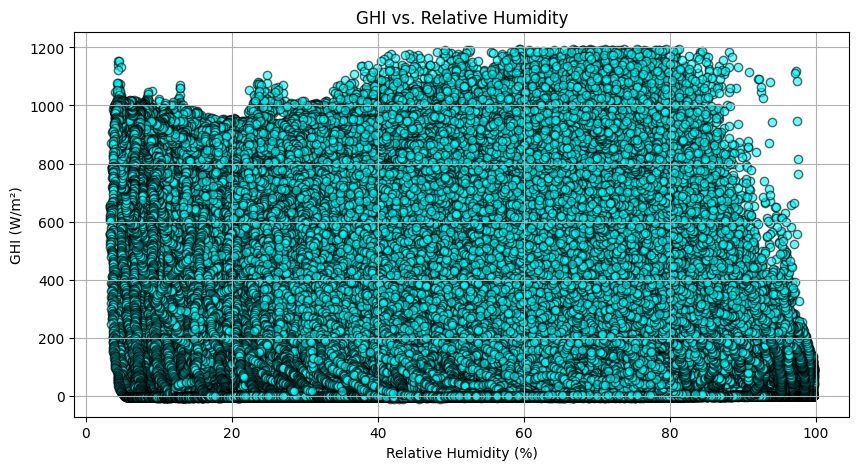

In [72]:
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['GHI'], alpha=0.6, color='aqua', edgecolor='black')
plt.title("GHI vs. Relative Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


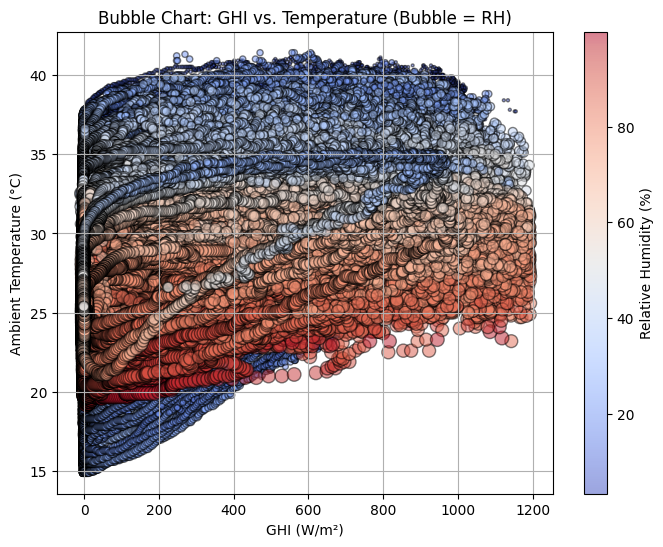

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'],alpha=0.5, c=df['RH'], cmap='coolwarm', edgecolors='k')
plt.title("Bubble Chart: GHI vs. Temperature (Bubble = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Ambient Temperature (°C)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.show()
